# Run power analysis
Steps:
1. Define input data
    - Statistical parametric map array
    - Mask array
    - Data type (t- or z-values)
    - Analysis design (one- or two-sample)
    - Sample size
    - Cluster-defining threshold
    - Alpha (cluster-extent threshold)
    - FWHM
    
2. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import join

import numpy as np
import pandas as pd
import nibabel as nib

from neuropower.neuropowermodels import run_power_analysis, nulPDF, altPDF, mixPDF, plot_stuff, threshold, altCDF

/Users/tsalo/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Values for input data
in_file = '/Users/tsalo/Downloads/task001_cope09_mirror-reversal - plain-text.nii'
dtype = 't'
n = 14
design = 'one-sample'
cdt = 0.01
alpha = 0.05
fwhm = [8., 8., 8.]
'''
in_file = '/Users/tsalo/Desktop/ns-dataset/metas/topic_001_specificity_z.nii.gz'
dtype = 'z'
n = 0
design = 'one-sample'
cdt = 0.001
alpha = 0.05'''

# Load data
img = nib.load(in_file)
spm = img.get_data()
mask = (spm!=0).astype(int)
mask_img = nib.Nifti1Image(mask, img.affine)

# Constants
n_iters = 100
params, power_df = run_power_analysis(img, mask_img, dtype, n,
                                      design, cdt, alpha, 'RFT',
                                      n_iters, fwhm)

In [3]:
power_df.head()

,BF,BH,RFT,UN
sample size,,,,
14,0.004809,0.437747,0.019920,0.753276
15,0.008868,0.524065,0.033078,0.816042
16,0.015392,0.606762,0.051955,0.866470
17,0.025294,0.682723,0.077610,0.905501
18,0.039550,0.749867,0.110792,0.934704


/Users/tsalo/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


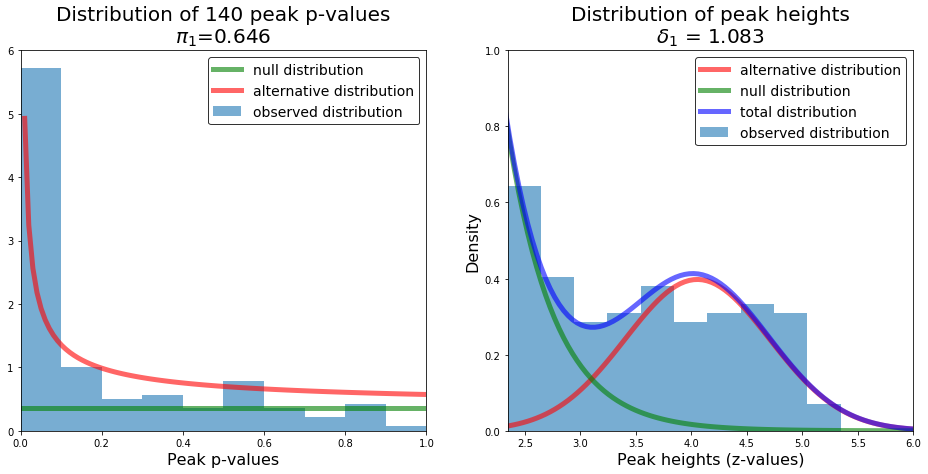

In [4]:
fig, ax = plot_stuff(params)
fig.show()

In [5]:
# 44 without adjusting p-values
power_df.loc[power_df['RFT']>=0.8]

,BF,BH,RFT,UN
sample size,,,,
31,0.674170,0.998018,0.837697,0.999899
32,0.725704,0.998775,0.871487,0.999945
33,0.772161,0.999252,0.899650,0.999970
34,0.813240,0.999549,0.922701,0.999984
35,0.848896,0.999731,0.941242,0.999991
36,0.879304,0.999842,0.955911,0.999995
37,0.904798,0.999908,0.967333,0.999998
38,0.925828,0.999947,0.976091,0.999999
39,0.942907,0.999970,0.982709,0.999999
